<a href="https://colab.research.google.com/github/mohammedyoonus/Boston-house-price-prediction/blob/main/Copy_of_Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Boston_Train.csv - Boston_Train.csv.csv")
df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
df


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,17.2
347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.401659,15.327635,8.435670,0.076923,0.510737,6.403900,60.817949,4.420862,4.472934,310.344729,17.707692,380.489174,10.407692,25.062678
std,0.641716,25.605040,6.088947,0.266850,0.102256,0.676424,28.393094,1.968666,1.615543,67.577707,2.198252,40.455904,5.888639,8.461918
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,0.057845,0.000000,4.025000,0.000000,0.437450,5.949500,36.150000,2.768500,4.000000,264.000000,16.100000,383.670000,6.095000,19.500000
50%,0.132620,0.000000,6.200000,0.000000,0.493000,6.266000,62.000000,4.095200,4.000000,304.000000,17.900000,392.690000,9.380000,22.900000
75%,0.404865,22.000000,10.010000,0.000000,0.544000,6.733000,88.450000,5.871800,5.000000,358.000000,19.100000,396.220000,13.210000,28.700000
max,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


In [ ]:
#DATATYPE INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     351 non-null    float64
 1   zn       351 non-null    float64
 2   indus    351 non-null    float64
 3   chas     351 non-null    int64  
 4   nox      351 non-null    float64
 5   rm       351 non-null    float64
 6   age      351 non-null    float64
 7   dis      351 non-null    float64
 8   rad      351 non-null    int64  
 9   tax      351 non-null    int64  
 10  ptratio  351 non-null    float64
 11  black    351 non-null    float64
 12  lstat    351 non-null    float64
 13  medv     351 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 38.5 KB


In [ ]:
#CHECK FOR NULL VALUES
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

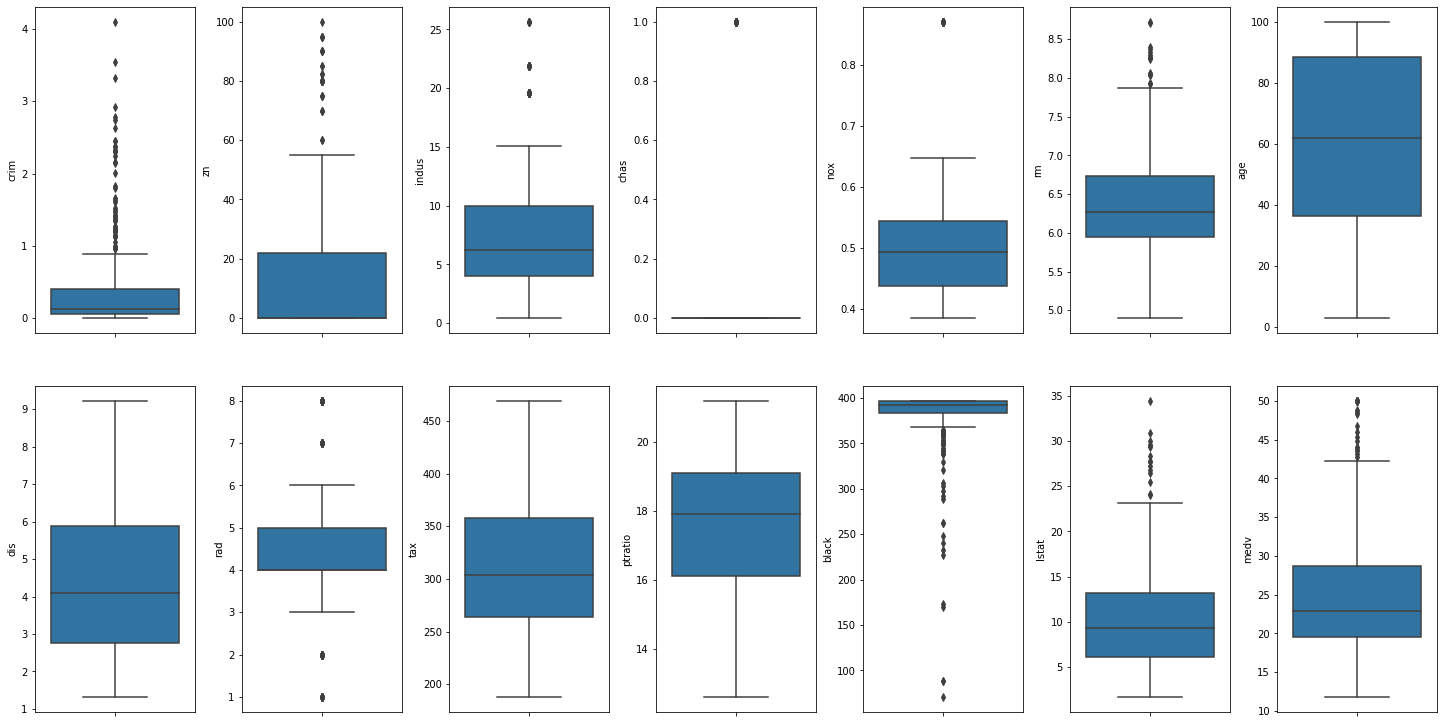

In [ ]:
#CREATRE BOX PLOT
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
cols=['crim','zn','indus','chas','nox']

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

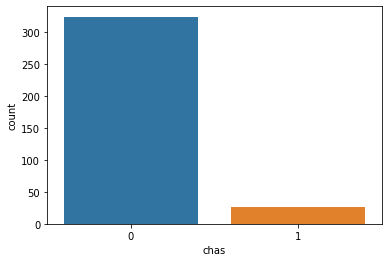

In [ ]:
sns.countplot(x='chas',data=d)

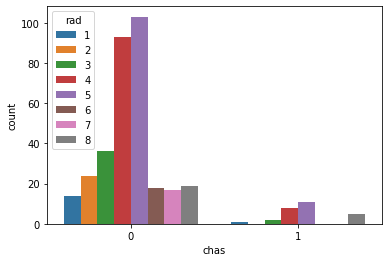

In [ ]:
sns.countplot(x='chas',hue='rad',data=d)

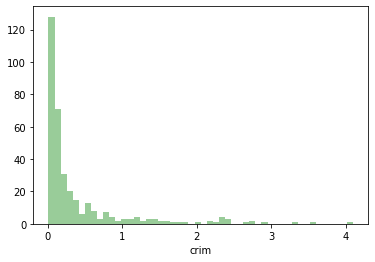

In [ ]:
sns.distplot(d['crim'].dropna(),kde=False,color='g',bins=50)

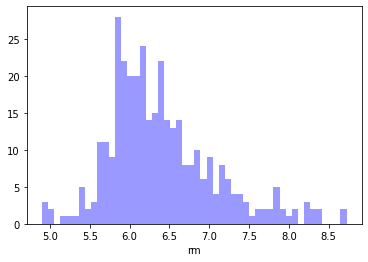

In [ ]:
sns.distplot(d['rm'].dropna(),kde=False,color='b',bins=50)

In [ ]:
# standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,indus,chas,nox
0,-0.616945,0.104518,-1.007467,-0.288675,0.266994
1,-0.584189,-0.599472,-0.224607,-0.288675,-0.408743
2,-0.584220,-0.599472,-0.224607,-0.288675,-0.408743
3,-0.576293,-0.599472,-1.028848,-0.288675,-0.516469
4,-0.519052,-0.599472,-1.028848,-0.288675,-0.516469


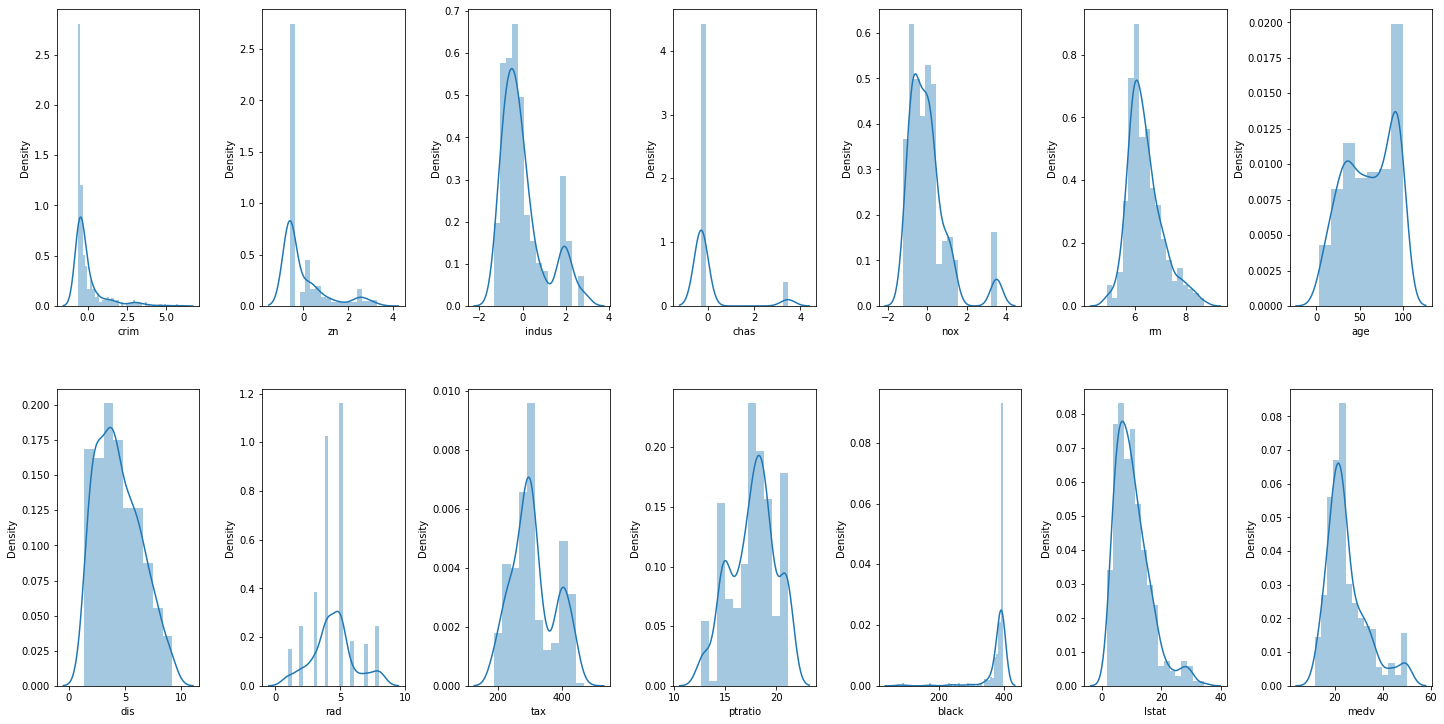

In [ ]:
for col in cols:
    df[col] = scaled_cols[col]
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

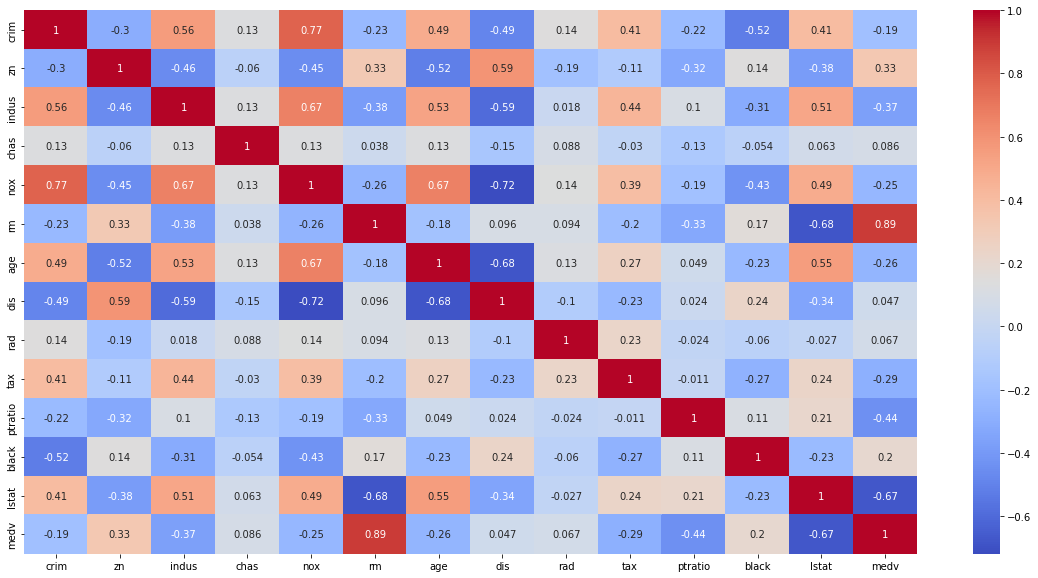

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

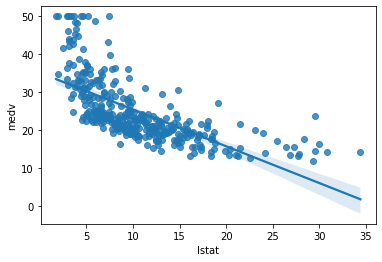

In [ ]:
sns.regplot(y=df['medv'], x=df['lstat'])


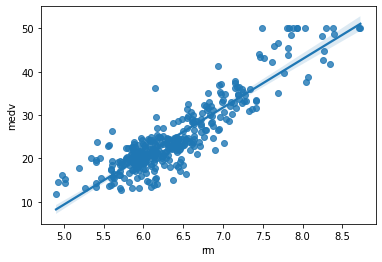

In [ ]:
sns.regplot(y=df['medv'], x=df['rm'])


In [ ]:
X = df.drop(columns=['medv', 'rad'], axis=1)
y = df['medv']


In [ ]:
X=df.iloc[:,0:13]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [ ]:
y_pred=model.predict(X_train)
print("Training accuracy:",model.score(X_train,y_train)*100)


Training accuracy: 88.87288540479278


In [ ]:
print("Testing accuracy:",model.score(X_test,y_test)*100)

Testing accuracy: 79.89583263244553


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print("Model Accuracy:",r2_score(y,model.predict(X))*100)

Model Accuracy: 87.29154920443398


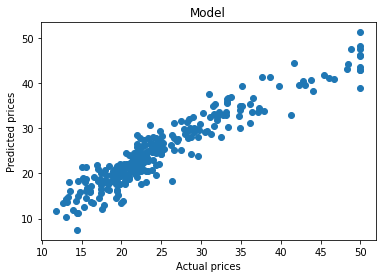

In [ ]:
plt.scatter(y_train,y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Model")
plt.show()

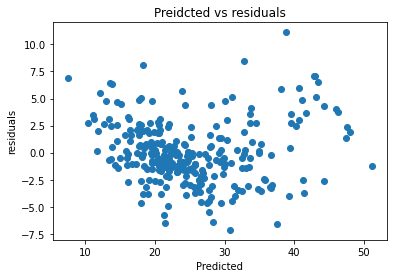

In [ ]:
#checking for residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Preidcted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("residuals")
plt.show()

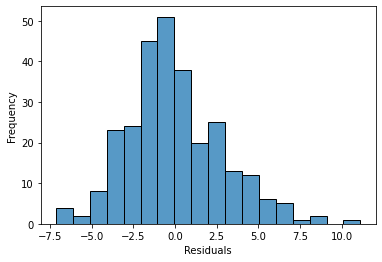

In [ ]:
#checking normality of errors
sns.histplot(y_train-y_pred)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=reg.predict(X_train)
print("Training Accuracy:",reg.score(X_train,y_train)*100)
print("Testing Accuracy",reg.score(X_test,y_test)*100)

Training Accuracy: 98.75680428081694
Testing Accuracy 83.85017917196086


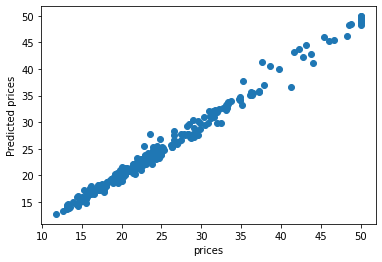

In [ ]:
plt.scatter(y_train,y_pred)
plt.xlabel("prices")
plt.ylabel("Predicted prices")
plt.show()